In [1]:
import math as m 
import numpy as np #used for matrix manipulation
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

$ \epsilon_{dot}=A \sigma^n d^{-m} f_{H2O}^r exp(\frac{-(Q+pV)}{RT})$<br>
<br>
<br>

In [2]:
flow_laws=pd.read_excel('modules/rheology/flow_lawsv2.xls')
rows=flow_laws.shape[0]
flow_laws.head(rows)

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
0,0,Albite,wet,100Ab,Disl_Creep,3.400,3.0,332.0,0,0.00,0.0,Offerhaus et al 2001
1,1,Albite,wet,100Ab,Diff_Creep,3.900,1.0,193.0,3,0.00,0.0,Offerhaus et al 2001
2,2,Anorthite,dry,100An,Disl_Creep,12.700,3.0,648.0,0,0.00,0.0,Rybacki & Dresen 2000
3,3,Anorthite,dry,100An,Disl_Creep,12.700,3.0,641.0,0,0.00,24.0,Rybacki et al 2006
4,4,Anorthite,wet,100An,Disl_Creep,2.600,3.0,356.0,0,0.00,0.0,Rybacki & Dresen 2000
5,5,Anorthite,wet,100An,Disl_Creep,0.200,3.0,345.0,0,1.00,38.0,Rybacki et al 2006
6,6,Anorthite,dry,100An,Diff_Creep,12.100,1.0,467.0,3,0.00,0.0,Rybacki & Dresen 2000
7,7,Anorthite,dry,100An,Diff_Creep,12.100,1.0,460.0,3,0.00,24.0,Rybacki et al 2006
8,8,Anorthite,wet,100An,Diff_Creep,1.700,1.0,170.0,3,0.00,0.0,Rybacki & Dresen 2000
9,9,Anorthite,wet,100An,Diff_Creep,-0.700,1.0,159.0,3,1.00,38.0,Rybacki et al 2006


In [3]:
##To identify all flow for a given mineral: flow_laws.loc[flow_laws['Mineral']=='Albite']
##Given reference: flow_laws.loc[flow_laws['Reference']=='Hirth et al 2001']
## Given n value: flow_laws.loc[flow_laws['n'] >= 3]
flow_laws.loc[flow_laws['Mineral']=='Albite']

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
0,0,Albite,wet,100Ab,Disl_Creep,3.4,3.0,332.0,0,0.0,0.0,Offerhaus et al 2001
1,1,Albite,wet,100Ab,Diff_Creep,3.9,1.0,193.0,3,0.0,0.0,Offerhaus et al 2001


In [4]:
##DO NOT ALTER (Unless you know what is happening here)------------------------------------------------
#This block creates a function that can be used to create grainsize vs differential stress maps
#to delineate where we expect dislocation creep vs. diffusion reep to occur
#REQUIRED INPUTS
    #1 flow law ID No. for dislocation creep
    #2 flow law ID No. for diffusion creep
    #3 Temperature in degrees C where you want to calculate
#OPTIONAL INPUTS (note, if you want to specify only some you need to include the variable and equals sign)
    #4 pressure for use in fugacity and pV term
    #5 minimum grain size exponent, 0=10^0, 1=10^1, etc. Default = 0 (1 μm grain size)
    #6 maximum grain size exponent, default = 4 (10000 μm = 1cm grain size)
    #7 differential stress exponent, 
    #8 savefigure as png flag

def d_σ_map_full(dis_ID, diff_ID, T_C, P=500, d_min=0, d_max=4, σ_min=-1, σ_max=3, png=False):
    T= T_C + 273.15 #convert T
    
    ##Create gridmesh over the grainsize and differential stress of interest
    d = np.linspace(d_min, d_max, 100)
    σ = np.linspace(σ_min, σ_max, 100)
    d = np.power(10, d)
    σ = np.power(10, σ)
    d_plot, σ_plot = np.meshgrid(d, σ)

##----------------------------------------H2O FUGACITY---------------------------------------------------------------------
    #This block calculates the fugacity of H2O, it should be implemented as a lookup table of fH2O values because it is rather computationally expensive
    #alternatively a simple approximation can be used as was done in the Kitter et al. (2016; J. Struc. Geol. 83, 194-206).
    #The code uses the Pitzer & Sterner (1994) formulation and was coded by Tony Withers, Downloaded from GitHub 1/2023 (https://github.com/forsterite/fugacity/)

    coeff=[]
    coeff.append([0,0,0.24657688e6,0.51359951e2,0,0])
    coeff.append([0,0,0.58638965e0,-0.28646939e-2,0.31375577e-4,0])
    coeff.append([0,0,-0.62783840e1,0.14791599e-1,0.35779579e-3,0.15432925e-7])
    coeff.append([0,0,0,-0.42719875e0,-0.16325155e-4,0])
    coeff.append([0,0,0.56654978e4,-0.16580167e2,0.76560762e-1,0])
    coeff.append([0,0,0,0.10917883e0,0,0])
    coeff.append([0.38878656e13,-0.13494878e9,0.30916564e6,0.75591105e1,0,0])
    coeff.append([0,0,-0.65537898e5,0.18810675e3,0,0])
    coeff.append([-0.14182435e14,0.18165390e9,-0.19769068e6,-0.23530318e2,0,0])
    coeff.append([0,0,0.92093375e5,0.12246777e3,0,0])

    def PSeos(volume, temperature, targetP):  # cc/mol, Kelvins, bars
        R=8314510  # Pa.cc/K/mol
        den=1/volume[0]  # mol/cc
        c=[]
        for i in range(10):
            c.insert(i,coeff[i][0]*temperature**-4+coeff[i][1]*temperature**-2
                     +coeff[i][2]*temperature**-1+coeff[i][3]
                     +coeff[i][4]*temperature+coeff[i][5]*temperature**2)
        pressure=(den+c[0]*den**2-den**2*((c[2]+2*c[3]*den+3*c[4]*den**2
                  +4*c[5]*den**3)/(c[1]+c[2]*den+c[3]*den**2+c[4]*den**3
                  +c[5]*den**4)**2)+c[6]*den**2*m.exp(-c[7]*den)
                  +c[8]*den**2*m.exp(-c[9]*den))*R*temperature/1e5
        return pressure-targetP  # bars

    def PSvolume(pressure, temperature):  # bars, Kelvins
        volume=optimize.root(PSeos, 10, args = (temperature, pressure))
        return volume.x

    def PSfugacity(pressure, temperature):  # bars, Kelvins
        R=8314510  # Pa.cc/K/mol
        c=[]
        for i in range(10):
            c.insert(i,coeff[i][0]*temperature**-4+coeff[i][1]*temperature**-2
                     +coeff[i][2]*temperature**-1+coeff[i][3]
                     +coeff[i][4]*temperature+coeff[i][5]*temperature**2)
        volume=PSvolume(pressure, temperature)
        den=1/volume[0]  # mol/cc
        fug=m.exp(m.log(den)+c[0]*den+(1/(c[1]+c[2]*den+c[3]*den**2
                                             +c[4]*den**3+c[5]*den**4)-1/c[1])
                     -c[6]/c[7]*(m.exp(-c[7]*den)-1)
                     -c[8]/c[9]*(m.exp(-c[9]*den)-1)
                     +pressure*1e5/(den*R*temperature)
                     +m.log(R*temperature)-1)/1e5
        return fug  # bars
##-----------------------------------------------------------------------------------------------------------------##    
    fugacity = PSfugacity(P*10, T)/10 #fugacity, need to convert input P to bars (hence P*10),
    #and output fogacity back to MPa (hence/10)
    
    ##calculate strain rates over grid for dislocation and diffusion mechanisms
    ϵ_dsc = m.pow(10,flow_laws.logA[dis_ID]) * np.power(σ_plot, flow_laws.n[dis_ID])\
            * np.power(d_plot, -1*flow_laws.m[dis_ID])* m.pow(fugacity, flow_laws.r[dis_ID])\
            * m.exp(-1*(1000*flow_laws.Q[dis_ID]+(P*flow_laws.V[dis_ID]))/(8.314*T))
    ϵ_dfc = m.pow(10,flow_laws.logA[diff_ID]) * np.power(σ_plot, flow_laws.n[diff_ID])\
            * np.power(d_plot, -1*flow_laws.m[diff_ID]) * m.pow(fugacity, flow_laws.r[diff_ID])\
            * m.exp(-1*(1000*flow_laws.Q[diff_ID]+(P*flow_laws.V[diff_ID]))/(8.314*T))
    ## sum the two grids
    ϵ_plot = ϵ_dsc + ϵ_dfc
    
    ##plotting labels
    label='T = {}\u00B0C'
    suplabel = '{0} {1} {2}: {3}\n{4} {5} {6}: {7}'
    savelabel = '{0}_{1}_{2}_{3}.png'
    
    ##plot the results
    h = plt.contourf(d_plot, σ_plot, np.log10(ϵ_plot), levels=[-16, -14, -12, -10, -8, -6], cmap=plt.cm.bone)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('grain size (um)')
    plt.ylabel('σ (MPa)')
    plt.colorbar(label='log(ϵ\u0307) (s\u00B9)')
    plt.title(label.format(T_C),y=1)
    plt.suptitle(suplabel.format(flow_laws.Mineral[dis_ID],flow_laws.H2O[dis_ID],flow_laws.Flow_Law[dis_ID],flow_laws.Reference[dis_ID],
        flow_laws.Mineral[diff_ID],flow_laws.H2O[diff_ID],flow_laws.Flow_Law[diff_ID],flow_laws.Reference[diff_ID]), y=1)
    if png==True:
        plt.savefig(savelabel.format(flow_laws.H2O[dis_ID],flow_laws.Mineral[dis_ID],flow_laws.H2O[diff_ID],flow_laws.Mineral[diff_ID]))
    plt.show()
    
#d_σ_map_full(0,1,650)


In [5]:
##DO NOT ALTER (Unless you know what is happening here)------------------------------------------------
#This block creates a function that can be used to create grainsize vs differential stress maps
#to delineate where we expect dislocation creep vs. diffusion reep to occur
#REQUIRED INPUTS
    #1 flow law ID No. for dislocation creep
    #2 flow law ID No. for diffusion creep
    #3 Temperature in degrees C where you want to calculate
#OPTIONAL INPUTS (note, if you want to specify only some you need to include the variable and equals sign)
    #4 minimum grain size exponent, 0=10^0, 1=10^1, etc. Default = 0 (1 μm grain size)
    #5 maximum grain size exponent, default = 4 (10000 μm = 1cm grain size)
    #6 differential stress exponent, 
    #7

def d_σ_map(dis_ID, diff_ID, T_C, d_min=0, d_max=4, σ_min=-1, σ_max=3, png=False):
    T= T_C + 273.15 #convert T
    
    ##Create gridmesh over the grainsize and differential stress of interest
    d = np.linspace(d_min, d_max, 100)
    σ = np.linspace(σ_min, σ_max, 100)
    d = np.power(10, d)
    σ = np.power(10, σ)
    d_plot, σ_plot = np.meshgrid(d, σ)

    ##calculate strain rates over grid for dislocation and diffusion mechanisms
    ϵ_dsc = np.power(10,flow_laws.logA[dis_ID]) * np.power(σ_plot, flow_laws.n[dis_ID]) * m.exp(-1000*flow_laws.Q[dis_ID]/(8.314*T))
    ϵ_dfc = np.power(10,flow_laws.logA[diff_ID]) * σ_plot * np.power(d_plot, -1*flow_laws.m[diff_ID]) * m.exp (-1000*flow_laws.Q[diff_ID]/(8.314*T))
    ## sum the two grids
    ϵ_plot = ϵ_dsc + ϵ_dfc
    
    ##plotting labels
    label='T = {}\u00B0C'
    suplabel = '{0} {1} {2}: {3}\n{4} {5} {6}: {7}'
    savelabel = '{0}_{1}_{2}_{3}.png'
    
    ##plot the results
    h = plt.contourf(d_plot, σ_plot, np.log10(ϵ_plot), levels=[-16, -14, -12, -10, -8, -6], cmap=plt.cm.bone)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('grain size (um)')
    plt.ylabel('σ (MPa)')
    plt.colorbar(label='log(ϵ\u0307) (s\u00B9)')
    plt.title(label.format(T_C),y=1)
    plt.suptitle(suplabel.format(flow_laws.Mineral[dis_ID],flow_laws.H2O[dis_ID],flow_laws.Flow_Law[dis_ID],flow_laws.Reference[dis_ID],
        flow_laws.Mineral[diff_ID],flow_laws.H2O[diff_ID],flow_laws.Flow_Law[diff_ID],flow_laws.Reference[diff_ID]), y=1)
    if png==True:
        plt.savefig(savelabel.format(flow_laws.H2O[dis_ID],flow_laws.Mineral[dis_ID],flow_laws.H2O[diff_ID],flow_laws.Mineral[diff_ID]))
    plt.show()
    
#d_σ_map(0,1,650)


In [6]:
flow_laws.loc[flow_laws['Mineral']=='Anorthite']

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
2,2,Anorthite,dry,100An,Disl_Creep,12.7,3.0,648.0,0,0.0,0.0,Rybacki & Dresen 2000
3,3,Anorthite,dry,100An,Disl_Creep,12.7,3.0,641.0,0,0.0,24.0,Rybacki et al 2006
4,4,Anorthite,wet,100An,Disl_Creep,2.6,3.0,356.0,0,0.0,0.0,Rybacki & Dresen 2000
5,5,Anorthite,wet,100An,Disl_Creep,0.2,3.0,345.0,0,1.0,38.0,Rybacki et al 2006
6,6,Anorthite,dry,100An,Diff_Creep,12.1,1.0,467.0,3,0.0,0.0,Rybacki & Dresen 2000
7,7,Anorthite,dry,100An,Diff_Creep,12.1,1.0,460.0,3,0.0,24.0,Rybacki et al 2006
8,8,Anorthite,wet,100An,Diff_Creep,1.7,1.0,170.0,3,0.0,0.0,Rybacki & Dresen 2000
9,9,Anorthite,wet,100An,Diff_Creep,-0.7,1.0,159.0,3,1.0,38.0,Rybacki et al 2006


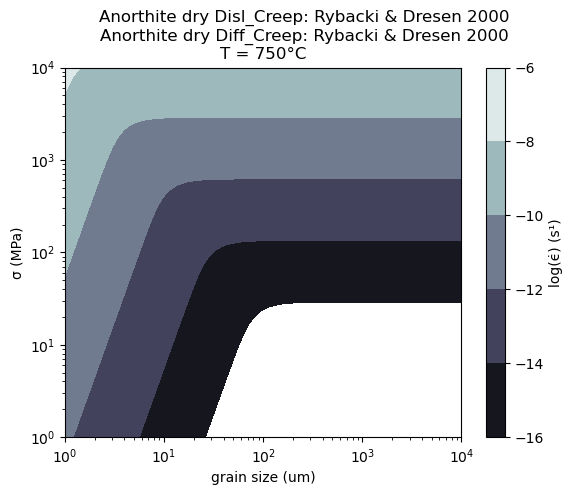

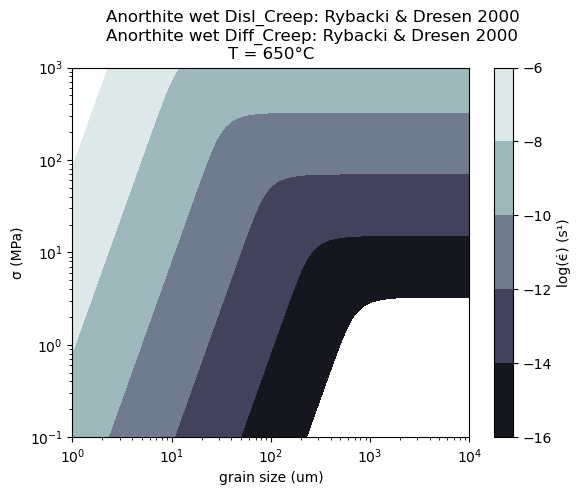

In [51]:
#d_σ_map_full(dis_ID, diff_ID, T_C, P=500, d_min=0, d_max=4, σ_min=-1, σ_max=3, png=False):
d_σ_map_full(2,6,750, σ_min=0, σ_max=4)
d_σ_map_full(4,8,650)

In [8]:
flow_laws.loc[flow_laws['Mineral']=='Olivine']

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
23,23,Olivine,dry,100Ol,Disl_Creep,5.0,3.5,530.0,0,0.00,18.0,Hirth & Kohlstedt 2003
24,24,Olivine,dry,100Ol,Disl_Creep,6.1,3.0,510.0,0,0.00,14.0,Karato & Jung 2003
25,25,Olivine,wet,100Ol,Disl_Creep,3.2,3.0,470.0,0,0.98,20.0,Mei & Kohlstedt 2000
26,26,Olivine,wet,100Ol,Disl_Creep,3.2,3.5,520.0,0,1.20,22.0,Hirth & Kohlstedt 2003
27,27,Olivine,wet,100Ol,Disl_Creep,2.9,3.0,470.0,0,1.20,24.0,Karato & Jung 2003
28,28,Olivine,dry,100Ol,Diff_Creep,9.2,1.0,375.0,3,0.00,10.0,Hirth & Kohlstedt 2003
29,29,Olivine,dry,100Ol,Diff_Creep,10.3,1.4,484.0,3,0.00,0.0,Faul & Jackson 2006
30,30,Olivine,wet,100Ol,Diff_Creep,4.7,1.0,295.0,3,1.00,20.0,Mei & Kohlstedt 2000
31,31,Olivine,wet,100Ol,Diff_Creep,7.4,1.0,375.0,3,1.00,20.0,Hirth & Kohlstedt 2003


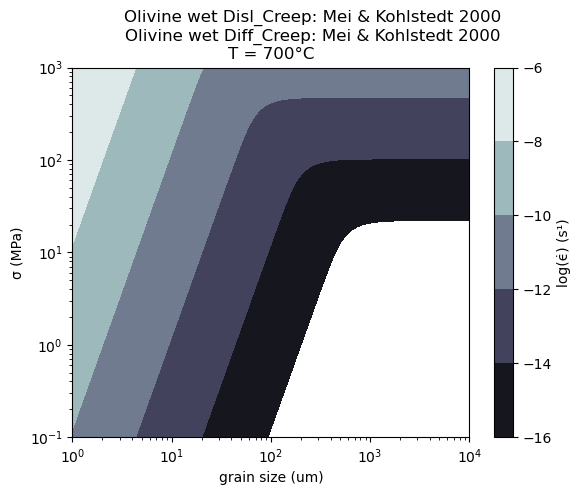

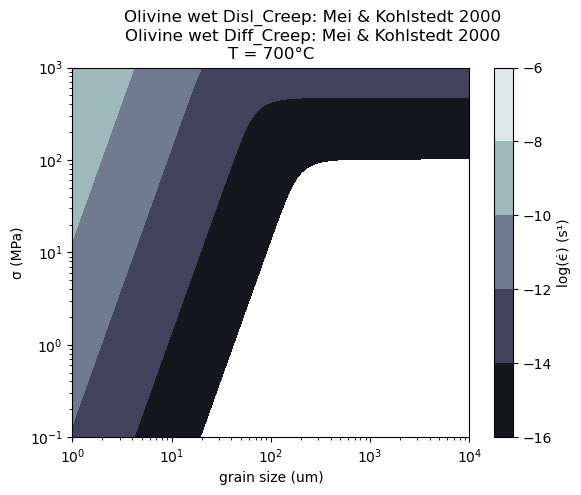

In [40]:
#d_σ_map_full(dis_ID, diff_ID, T_C, P=500, d_min=0, d_max=4, σ_min=-1, σ_max=3, png=False):
d_σ_map_full(25,30,700)
d_σ_map(25,30,700)

In [43]:
flow_laws.loc[flow_laws['Mineral']=='Clinopyroxene']

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
12,12,Clinopyroxene,dry,100Cpx,Disl_Creep,9.8,4.7,760.0,0,0.0,0.0,Bystricky & Mackwell 2001
13,13,Clinopyroxene,dry,100Cpx,Disl_Creep,10.8,4.7,760.0,0,0.0,0.0,Bystricky & Mackwell 2001
14,14,Clinopyroxene,wet,100Cpx,Disl_Creep,6.7,2.7,670.0,0,3.0,0.0,Chen et al 2006
15,15,Clinopyroxene,dry,100Cpx,Diff_Creep,23.5,1.0,760.0,3,0.0,0.0,Hier-Majumder et al 2005
16,16,Clinopyroxene,dry,100Cpx,Diff_Creep,15.1,1.0,460.0,3,0.0,0.0,Bystricky & Mackwell 2001
17,17,Clinopyroxene,wet,100Cpx,Diff_Creep,6.1,1.0,340.0,3,1.4,14.0,Hier-Majumder et al 2005


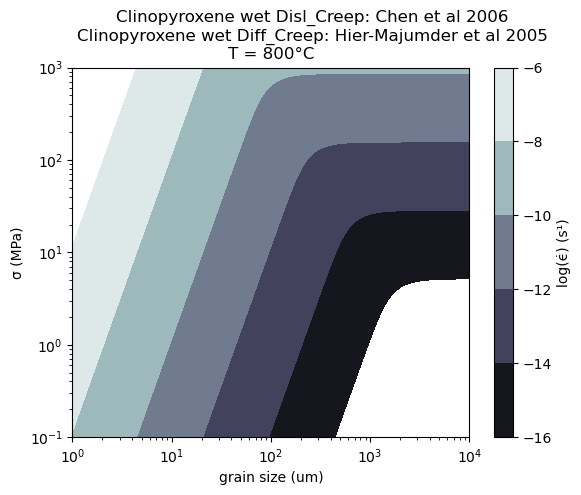

In [48]:
#d_σ_map_full(dis_ID, diff_ID, T_C, P=500, d_min=0, d_max=4, σ_min=-1, σ_max=3, png=False):
d_σ_map_full(14,17,800, d_min=0, d_max=4, σ_min=-1, σ_max=3)

In [32]:
def σ_ϵ_full(fl_IDs, T_C, P=500, σ_min=-1, σ_max=3, d_plot=2):
    fl_IDs=np.array(fl_IDs)
    T = T_C + 273.15 #temperature degrees C
    R = 8.314 #gas constant
    leglab= '{0} {1}: {2}'
    
    σ_range = np.linspace(σ_min, σ_max, 100)
    σ_range = np.power(10,σ_range)
    d_plot = m.pow(10,d_plot)

    ##----------------------------------------H2O FUGACITY---------------------------------------------------------------------
    #This block calculates the fugacity of H2O, it should be implemented as a lookup table of fH2O values because it is rather computationally expensive
    #alternatively a simple approximation can be used as was done in the Kitter et al. (2016; J. Struc. Geol. 83, 194-206).
    #The code uses the Pitzer & Sterner (1994) formulation and was coded by Tony Withers, Downloaded from GitHub 1/2023 (https://github.com/forsterite/fugacity/)

    coeff=[]
    coeff.append([0,0,0.24657688e6,0.51359951e2,0,0])
    coeff.append([0,0,0.58638965e0,-0.28646939e-2,0.31375577e-4,0])
    coeff.append([0,0,-0.62783840e1,0.14791599e-1,0.35779579e-3,0.15432925e-7])
    coeff.append([0,0,0,-0.42719875e0,-0.16325155e-4,0])
    coeff.append([0,0,0.56654978e4,-0.16580167e2,0.76560762e-1,0])
    coeff.append([0,0,0,0.10917883e0,0,0])
    coeff.append([0.38878656e13,-0.13494878e9,0.30916564e6,0.75591105e1,0,0])
    coeff.append([0,0,-0.65537898e5,0.18810675e3,0,0])
    coeff.append([-0.14182435e14,0.18165390e9,-0.19769068e6,-0.23530318e2,0,0])
    coeff.append([0,0,0.92093375e5,0.12246777e3,0,0])

    def PSeos(volume, temperature, targetP):  # cc/mol, Kelvins, bars
        R=8314510  # Pa.cc/K/mol
        den=1/volume[0]  # mol/cc
        c=[]
        for i in range(10):
            c.insert(i,coeff[i][0]*temperature**-4+coeff[i][1]*temperature**-2
                     +coeff[i][2]*temperature**-1+coeff[i][3]
                     +coeff[i][4]*temperature+coeff[i][5]*temperature**2)
        pressure=(den+c[0]*den**2-den**2*((c[2]+2*c[3]*den+3*c[4]*den**2
                  +4*c[5]*den**3)/(c[1]+c[2]*den+c[3]*den**2+c[4]*den**3
                  +c[5]*den**4)**2)+c[6]*den**2*m.exp(-c[7]*den)
                  +c[8]*den**2*m.exp(-c[9]*den))*R*temperature/1e5
        return pressure-targetP  # bars

    def PSvolume(pressure, temperature):  # bars, Kelvins
        volume=optimize.root(PSeos, 10, args = (temperature, pressure))
        return volume.x

    def PSfugacity(pressure, temperature):  # bars, Kelvins
        R=8314510  # Pa.cc/K/mol
        c=[]
        for i in range(10):
            c.insert(i,coeff[i][0]*temperature**-4+coeff[i][1]*temperature**-2
                     +coeff[i][2]*temperature**-1+coeff[i][3]
                     +coeff[i][4]*temperature+coeff[i][5]*temperature**2)
        volume=PSvolume(pressure, temperature)
        den=1/volume[0]  # mol/cc
        fug=m.exp(m.log(den)+c[0]*den+(1/(c[1]+c[2]*den+c[3]*den**2
                                             +c[4]*den**3+c[5]*den**4)-1/c[1])
                     -c[6]/c[7]*(m.exp(-c[7]*den)-1)
                     -c[8]/c[9]*(m.exp(-c[9]*den)-1)
                     +pressure*1e5/(den*R*temperature)
                     +m.log(R*temperature)-1)/1e5
        return fug  # bars
##-----------------------------------------------------------------------------------------------------------------##    
    fugacity = PSfugacity(P*10, T)/10 #fugacity, need to convert input P to bars (hence P*10),
    #and output fogacity back to MPa (hence/10)
    
    for i in range(0,fl_IDs.shape[0]):
        if flow_laws.Flow_Law[fl_IDs[i]]=='Peierles':
            ϵ_out = m.pow(10,flow_laws.logA[fl_IDs[i]]) * np.power((σ_range/35000), flow_laws.n[fl_IDs[i]])\
                * np.exp((-1*(1000*flow_laws.Q[fl_IDs[i]])/(8.314*T))*np.power(1-(σ_range/2420),1.18))
        else:
            ϵ_out = m.pow(10,flow_laws.logA[fl_IDs[i]]) * np.power(σ_range, flow_laws.n[fl_IDs[i]])\
                * np.power(d_plot, -1*flow_laws.m[fl_IDs[i]])* m.pow(fugacity, flow_laws.r[fl_IDs[i]])\
                * m.exp(-1*(1000*flow_laws.Q[fl_IDs[i]]+(P*flow_laws.V[fl_IDs[i]]))/(8.314*T))
        plt.plot(ϵ_out, σ_range, label=leglab.format(flow_laws.Mineral[fl_IDs[i]], flow_laws.Flow_Law[fl_IDs[i]], flow_laws.Reference[fl_IDs[i]]))
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('ϵ\u0307 (s\u207B\u00B9)')
        plt.ylabel('σ (MPa)')
        plt.legend(loc='lower right', fontsize=8)
        #plt.title(T, fH2O, P, d, etc...)

In [33]:
flow_laws.loc[flow_laws['Mineral']=='Albite']

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
0,0,Albite,wet,100Ab,Disl_Creep,3.4,3.0,332.0,0,0.0,0.0,Offerhaus et al 2001
1,1,Albite,wet,100Ab,Diff_Creep,3.9,1.0,193.0,3,0.0,0.0,Offerhaus et al 2001


In [34]:
flow_laws.head(rows)

,ID,Mineral,H2O,Min_Mode,Flow_Law,logA,n,Q,m,r,V,Reference
0,0,Albite,wet,100Ab,Disl_Creep,3.400,3.0,332.0,0,0.00,0.0,Offerhaus et al 2001
1,1,Albite,wet,100Ab,Diff_Creep,3.900,1.0,193.0,3,0.00,0.0,Offerhaus et al 2001
2,2,Anorthite,dry,100An,Disl_Creep,12.700,3.0,648.0,0,0.00,0.0,Rybacki & Dresen 2000
3,3,Anorthite,dry,100An,Disl_Creep,12.700,3.0,641.0,0,0.00,24.0,Rybacki et al 2006
4,4,Anorthite,wet,100An,Disl_Creep,2.600,3.0,356.0,0,0.00,0.0,Rybacki & Dresen 2000
5,5,Anorthite,wet,100An,Disl_Creep,0.200,3.0,345.0,0,1.00,38.0,Rybacki et al 2006
6,6,Anorthite,dry,100An,Diff_Creep,12.100,1.0,467.0,3,0.00,0.0,Rybacki & Dresen 2000
7,7,Anorthite,dry,100An,Diff_Creep,12.100,1.0,460.0,3,0.00,24.0,Rybacki et al 2006
8,8,Anorthite,wet,100An,Diff_Creep,1.700,1.0,170.0,3,0.00,0.0,Rybacki & Dresen 2000
9,9,Anorthite,wet,100An,Diff_Creep,-0.700,1.0,159.0,3,1.00,38.0,Rybacki et al 2006


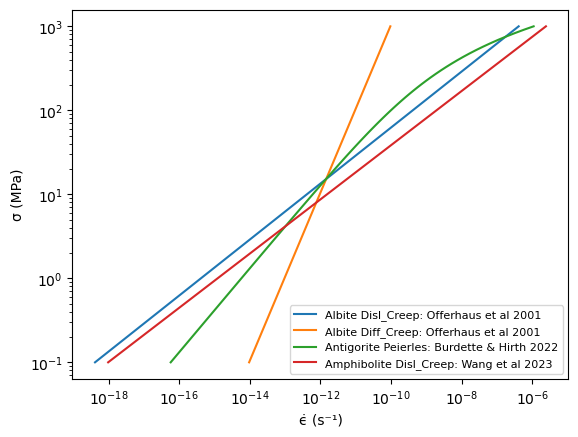

In [38]:
σ_ϵ_full([0,1,11,38], 650, P=700, d_plot=m.log10(100))